# Predicting Car Prices

In this project, we'll predict a car's market price using the *k-nearest neighbors algorithm*. The dataset we will be working with contains information on various cars. For each car, we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. More information about the dataset can be found in its [documentation](https://archive.ics.uci.edu/ml/datasets/automobile) and downloaded directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).


## Introduction to the dataset


Let's start with reading the dataset and determining the relevant numerical columns to be used as features and which one is the target column.

In [1]:
import pandas as pd
import numpy as np

# Original columns names mentioned in the dataset documentation
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Read in the dataset as a pandas DataFrame
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


Given our goal is to predict car prices, the column to be used as the target column will be the `price` column.


## Data Cleaning

Based on the dataset preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from `0` to `1`.

In [3]:
# Replace all '?' values with NaN values
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Check the data types in each column
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [5]:
# Convert all columns to float data type
numeric_cars = numeric_cars.astype('float')

# Looking for missing values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# Remove any rows with missing values in the 'price' column
numeric_cars = numeric_cars.dropna(subset=['price'])

# Replace missing values in other columns using column means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

# Confirm there are no more missing values
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# Normalise all columnns to range from 0 to 1, EXCEPT the target column('price')
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

## Univariate Model

Let's start with some univariate k-nearest neighbors models.

We'll create a function, named `knn_train_test()` that encapsulates the training and simple validation process.

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    # Randomise the order of the DataFrame
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index).copy()
    
    # Split the DataFrame in half and round it
    last_train_row = int(len(random_df) / 2)
    
    # Select the training and test sets
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    # Instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    # Fit the KNN model on the training set using default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions on the test set
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

Now we'll use this function to train and test univariate models using the different numeric columns in the dataset to see which column performs the best using the default **k** value.

In [9]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (except 'price'), train and test a model
# Return RMSE value and add it to 'rmse_results' dictionary
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
# Create a Series object from the dictionary
# Print the results
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The `engine-size` column performed the best using the default **k** value.

We'll modify `the knn_train_test()` function we wrote above to accept a parameter for the **k** value. For each numeric column, we'll create, train, and test a univariate model using the following `k` values (`1`, `3`, `5`, `7`, and `9`).

In [10]:
def knn_train_test(train_col, target_col, df):
    
    # Randomize the order of the DataFrame
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index).copy()
    
    # Split the DataFrame in half and round it
    last_train_row = int(len(random_df) / 2)
    
    # Select the training and test sets
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_values:
        # Instantiate the KNeighborsRegressor class using k_values
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # Fit the KNN model on the training set
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        # Make predictions on the test set
        predicted_labels = knn.predict(test_df[[train_col]])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        # Add the pair (k,rmse) to k_rmses dictionary
        k_rmses[k] = rmse
    
    return k_rmses

Now we'll use this new function to train and test univariate models using the different numeric columns in the dataset to see which column performs the best using different **k** values.

In [11]:
k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (except 'price'), train and test a model
# Return RMSE value and add it to 'k_rmse_results' dictionary
for col in train_cols:
    k_rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = k_rmse_val

# Print the results
k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


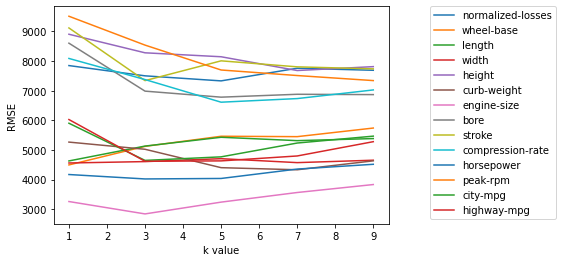

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)

The `engine-size` column also performed the best using different **k** values.

## Multivariate Model

Let's modify the `knn_train_test()` function we wrote in the last step to work with multiple columns.

First, we'll compute the average RMSE for each column in the `k_rmse_results` dictionary and sort them according to the best RMSEs.

In [13]:
# Compute average RMSE across different k values for each feature
feature_avg_rmse = {}

for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

# Column names of the features in order of the best RMSEs
sorted_features = sorted_series_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [14]:
# Function to work with multiple columns and default k value

def knn_train_test(train_cols, target_col, df):
    
    # Randomize the order of the DataFrame
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index).copy()
    
    # Split the DataFrame in half and round it
    last_train_row = int(len(random_df) / 2)
    
    # Select the training and test sets
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Instantiate the KNeighborsRegressor class using k_values
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # Fit the KNN model on the training set
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions on the test set
        predicted_labels = knn.predict(test_df[train_cols])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        # Add the pair (k,rmse) to k_rmses dictionary
        k_rmses[k] = rmse
    
    return k_rmses

In [15]:
# RMSE values for 2, 3, 4 and 5 best features using default k value

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats], 'price', numeric_cars
    )

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805}}

The best result using multiple columns and default **k** value is with two best features: `engine-size` and `horsepower`.


## Hyperparameter Tuning

Let's now optimise the model that performed the best in the previous step.

For the top 3 models in the last step, we'll vary the hyperparameter value from `1` to `25` and plot the resulting RMSE values.

In [16]:
# Function to work with multiple columns and k values varying from 1 to 25

def knn_train_test(train_cols, target_col, df):
    
    # Randomize the order of the DataFrame
    np.random.seed(1)
    shuffle_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffle_index).copy()
    
    # Split the DataFrame in half and round it
    last_train_row = int(len(random_df) / 2)
    
    # Select the training and test sets
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,26)]
    k_rmses = {}
    
    for k in k_values:
        # Instantiate the KNeighborsRegressor class using k_values
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # Fit the KNN model on the training set
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions on the test set
        predicted_labels = knn.predict(test_df[train_cols])
    
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        # Add the pair (k,rmse) to k_rmses dictionary
        k_rmses[k] = rmse
    
    return k_rmses

In [17]:
# RMSE values for top 3 models in the last step

k_rmse_results = {}

for nr_best_feats in [2, 4, 5]:
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats], 'price', numeric_cars
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '4 best features': {1: 2952.725686581471,
  2: 3131.704952720018,
  3: 3129.692821910155,
  4: 3241.4320776448717,
  5: 3487.340917327035,
  6: 3637.0381471429987,
  7: 3606.195077860286,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293,
  11: 4162.564050411074,
  12: 4289.486490995821,
  13: 4368.061602779942,
  14: 4416.3047729

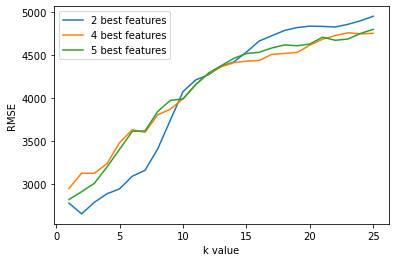

In [18]:
# Plot of RMSE values for the top 3 models in the last step

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc='upper left')

Let's see which **k** value is optimal for each model.

In [19]:
best_k = {}

for key,value in k_rmse_results.items():
    k = min(value, key=value.get)
    best_k['best k for {}'.format(key)] = k

best_k

{'best k for 2 best features': 2,
 'best k for 4 best features': 1,
 'best k for 5 best features': 1}

The model that performed the best is the model using two best features (`engine-size` and `horsepower`) and **k** = 2.


## Conclusion

In this project, we created *Univariate* and *Multivariate* models using the *k-nearest neighbors algorithm* to predict car prices. Among the models, the best result was obtained with a *Multivariate* model using 2 best features (`engine-size` and `horsepower`) and **k**=2.